In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

In [2]:
wine = pd.read_csv('data\WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
wine=wine.drop(columns=['Id'],axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = wine.drop(['quality'],axis=1)
Y = wine['quality']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
x_train.shape , x_test.shape

((914, 11), (229, 11))

In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

def eval_metrics(actual , predict):
    rmse = np.sqrt(mean_absolute_error(actual,predict))
    mae = mean_absolute_error(actual,predict)
    r2 = r2_score(actual,predict)

    return rmse , mae , r2

## LogisticRegression ##

In [7]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



c:\Users\mrath\anaconda3\envs\mlproj\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5633187772925764

## KNN ##

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5545851528384279

## SVC ##

In [9]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4497816593886463

## Decsion Tree ##

In [10]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_pred = model4.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5327510917030568

## GaussianNB  ##

In [11]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
y_pred = model5.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.48034934497816595

## Random Forest ##

In [12]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier()
model6.fit(x_train,y_train)
y_pred = model6.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6593886462882096

In [16]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest'],
    'Score': [0.563,0.554,0.449,0.532,0.480,0.659]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.659,Random Forest
0.563,Logistic Regression
0.554,KNN
0.532,Decision Tree
0.480,GaussianNB
0.449,SVC


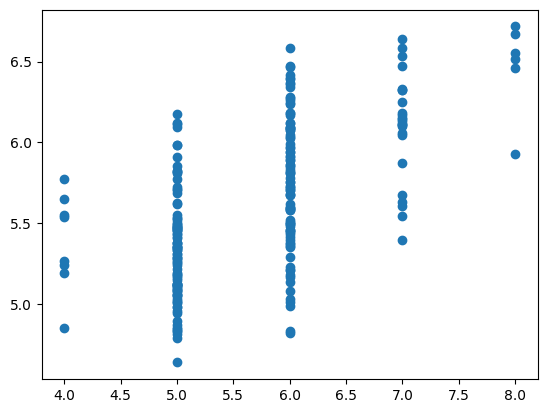

In [17]:
plt.scatter(y_test,y_pred)
xlabel= ('actual')
ylabel =('predict')

<Axes: xlabel='quality'>

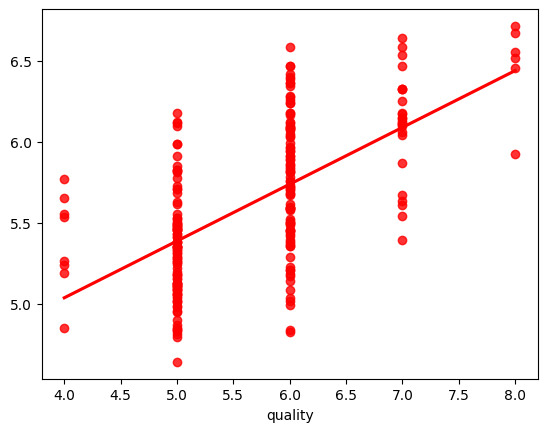

In [20]:
sns.regplot(x=y_test, y=y_pred,ci=None,color='red')